Question 1 : Test the law of Large Numbers fo N Random normally distributed Numbers with mean = 0 and stdev = 1 :

Create a Python Script that will count how many of these numbers fall between -1 and 1 and divide by the total quantity of N

you know taht E(X) = 68.2

Check that Mean(Xn)-> E(X) as you rerun your script while increasing N

In [194]:
import numpy as np
from numpy.random import randn

N=1000
counter=0
for i in randn(N):
    if (i >-1 and i <1):
        counter = counter+1
counter/N        

0.674

Question 2 : Scenario: You are a Data Scientist working for a consulting firm. One of your
colleagues from the Auditing department has asked you to help them assess the
financial statement of organisation X.
You have been supplied with two vectors of data: monthly revenue and monthly
expenses for the financial year in question. Your task is to calculate the following
financial metrics:
- profit for each month
- profit after tax for each month (the tax rate is 30%)
- profit margin for each month - equals to profit after tax divided by revenue
- good months - where the profit after tax was greater than the mean for the year
- bad months - where the profit after tax was less than the mean for the year
- the best month - where the profit after tax was max for the year
- the worst month - where the profit after tax was min for the year

All results need to be presented as vectors.

Results for dollar values need to be calculated with $0.01 precision, but need to be
presented in Units of $1,000 (i.e. 1k) with no decimal points.

Results for the profit margin ratio need to be presented in units of % with no
decimal points.

Note: Your colleague has warned you that it is okay for tax for any given month to be
negative (in accounting terms, negative tax translates into a deferred tax asset).

In [195]:
#Data 
revenue = [14574.49, 7606.46, 8611.41, 9175.41, 8058.65, 8105.44, 11496.28, 9766.09, 10305.32, 14379.96, 10713.97, 15433.50]
expenses = [12051.82, 5695.07, 12319.20, 12089.72, 8658.57, 840.20, 3285.73, 5821.12, 6976.93, 16618.61, 10054.37, 3803.96]

In [196]:
#Solution
#Calculate Profit As The Differences Between Revenue And Expenses
profit = list([])

for i in range (0, len(revenue)):
    profit.append(revenue[i] - expenses[i])
profit

[2522.67,
 1911.3900000000003,
 -3707.790000000001,
 -2914.3099999999995,
 -599.9200000000001,
 7265.24,
 8210.550000000001,
 3944.9700000000003,
 3328.3899999999994,
 -2238.6500000000015,
 659.5999999999985,
 11629.54]

In [197]:
#Calculate Tax As 30% Of Profit And Round To 2 Decimal Points
tax = [round(i * 0.3,2) for i in profit]
tax

[756.8,
 573.42,
 -1112.34,
 -874.29,
 -179.98,
 2179.57,
 2463.17,
 1183.49,
 998.52,
 -671.6,
 197.88,
 3488.86]

In [198]:
#Calculate Profit Remaining After Tax Is Deducted
profit_after_tax = list([])
for i in range (0, len(profit)):
    profit_after_tax.append(profit[i] - tax[i])
profit_after_tax

[1765.8700000000001,
 1337.9700000000003,
 -2595.4500000000007,
 -2040.0199999999995,
 -419.94000000000005,
 5085.67,
 5747.380000000001,
 2761.4800000000005,
 2329.8699999999994,
 -1567.0500000000015,
 461.71999999999855,
 8140.68]

In [199]:
#Calculate The Profit Margin As Profit After Tax Over Revenue
#Round To 2 Decimal Points, Then Multiply By 100 To Get %
profit_margin =  list([])
for i in range (0, len(profit)):
    profit_margin.append(profit_after_tax[i] / revenue[i])
profit_margin

profit_margin = [round((i*100),2) for i in profit_margin]

profit_margin

[12.12,
 17.59,
 -30.14,
 -22.23,
 -5.21,
 62.74,
 49.99,
 28.28,
 22.61,
 -10.9,
 4.31,
 52.75]

In [200]:
#Calculate The Mean Profit After Tax For The 12 Months
mean_pat = sum(profit_after_tax) / len(profit_after_tax)
mean_pat

1750.6816666666666

In [201]:
#Find The Months With Above-Mean Profit After Tax
good_months = list([])
for i in range (0, len(profit)):
    good_months.append(profit_after_tax[i] > mean_pat)
good_months

[True, False, False, False, False, True, True, True, True, False, False, True]

In [202]:
#Bad Months Are The Opposite Of Good Months!
bad_months = list([])
for i in range (0, len(profit)):
    bad_months.append(profit_after_tax[i] < mean_pat)
bad_months

[False, True, True, True, True, False, False, False, False, True, True, False]

In [203]:
#The Best Month Is Where Profit After Tax Was Equal To The Maximum
best_month = list([])
for i in range (0, len(profit)):
    best_month.append(profit_after_tax[i] == max(profit_after_tax))
best_month

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True]

In [204]:
#The Worst Month Is Where Profit After Tax Was Equal To The Minimum
worst_month = list([])
for i in range (0, len(profit)):
    worst_month.append(profit_after_tax[i] == min(profit_after_tax))
worst_month

[False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [205]:
#Convert All Calculations To Units Of One Thousand Dollars
revenue_1000 = [round(i/1000, 2) for i in revenue]
expenses_1000 = [round(i/1000, 2) for i in expenses]
profit_1000 = [round(i/1000, 2) for i in profit]
profit_after_tax_1000 = [round(i/1000, 0) for i in profit_after_tax]

revenue_1000 = [int(i) for i in revenue_1000]
expenses_1000 = [int(i) for i in expenses_1000]
profit_1000 = [int(i) for i in profit_1000]
profit_after_tax_1000 = [int(i) for i in profit_after_tax_1000]

In [206]:
#Print Results
print ("Revenue :") 
print (revenue_1000)
print ("Expenses :") 
print (expenses_1000)
print ("Profit :")
print(profit_1000)
print ("Profit after tax :")
print (profit_after_tax_1000)
print ("Profit margin :")
print (profit_margin)
print ("Good months :")
print (good_months)
print ("Bad months :")
print (bad_months)
print ("Best month :")
print (best_month)
print ("Worst month :")
print (worst_month)

Revenue :
[14, 7, 8, 9, 8, 8, 11, 9, 10, 14, 10, 15]
Expenses :
[12, 5, 12, 12, 8, 0, 3, 5, 6, 16, 10, 3]
Profit :
[2, 1, -3, -2, 0, 7, 8, 3, 3, -2, 0, 11]
Profit after tax :
[2, 1, -3, -2, 0, 5, 6, 3, 2, -2, 0, 8]
Profit margin :
[12.12, 17.59, -30.14, -22.23, -5.21, 62.74, 49.99, 28.28, 22.61, -10.9, 4.31, 52.75]
Good months :
[True, False, False, False, False, True, True, True, True, False, False, True]
Bad months :
[False, True, True, True, True, False, False, False, False, True, True, False]
Best month :
[False, False, False, False, False, False, False, False, False, False, False, True]
Worst month :
[False, False, True, False, False, False, False, False, False, False, False, False]


Question 3 : You have been supplied data for two more additional in-game statistics:
• Free Throws
• Free Throw Attempts
You need to create three plots that portray the following insights:
• Free Throw Attempts per game
• Accuracy of Free Throws
• Player playing style (2 vs 3 points preference) excluding Free Throws*
*Each Free Throw is worth 1 point
The data has been supplied in the form of vectors. You will have to create
the two matrices before you proceed with the analysis

Import the packages needed to perform the analysis

In [207]:
import numpy as np
import matplotlib.pyplot as plt

In [208]:
#Seasons
Seasons = ["2005","2006","2007","2008","2009","2010","2011","2012","2013","2014"]

#Players
Players = ["KobeBryant","JoeJohnson","LeBronJames","CarmeloAnthony","DwightHoward","ChrisBosh","ChrisPaul","KevinDurant","DerrickRose","DwayneWade"]

#Free Throws
KobeBryant_FT = [696,667,623,483,439,483,381,525,18,196]
JoeJohnson_FT = [261,235,316,299,220,195,158,132,159,141]
LeBronJames_FT = [601,489,549,594,593,503,387,403,439,375]
CarmeloAnthony_FT = [573,459,464,371,508,507,295,425,459,189]
DwightHoward_FT = [356,390,529,504,483,546,281,355,349,143]
ChrisBosh_FT = [474,463,472,504,470,384,229,241,223,179]
ChrisPaul_FT = [394,292,332,455,161,337,260,286,295,289]
KevinDurant_FT = [209,209,391,452,756,594,431,679,703,146]
DerrickRose_FT = [146,146,146,197,259,476,194,0,27,152]
DwayneWade_FT = [629,432,354,590,534,494,235,308,189,284]

#Free Throw Attempts
KobeBryant_FTA = [819,768,742,564,541,583,451,626,21,241]
JoeJohnson_FTA = [330,314,379,362,269,243,186,161,195,176]
LeBronJames_FTA = [814,701,771,762,773,663,502,535,585,528]
CarmeloAnthony_FTA = [709,568,590,468,612,605,367,512,541,237]
DwightHoward_FTA = [598,666,897,849,816,916,572,721,638,271]
ChrisBosh_FTA = [581,590,559,617,590,471,279,302,272,232]
ChrisPaul_FTA = [465,357,390,524,190,384,302,323,345,321]
KevinDurant_FTA = [256,256,448,524,840,675,501,750,805,171]
DerrickRose_FTA = [205,205,205,250,338,555,239,0,32,187]
DwayneWade_FTA = [803,535,467,771,702,652,297,425,258,370]

In [209]:
# Create the dicts representing Seasons and Players
# Seasons
Sdict = {"2005":0,"2006":1,"2007":2,"2008":3,"2009":4,"2010":5,"2011":6,"2012":7,"2013":8,"2014":9}

# Players
Pdict = {"KobeBryant":0,"JoeJohnson":1,"LeBronJames":2,"CarmeloAnthony":3,"DwightHoward":4,"ChrisBosh":5,"ChrisPaul":6,"KevinDurant":7,"DerrickRose":8,"DwayneWade":9}

In [210]:
# Matrix for Free Throws

# Bind the given vectors to form the matrix
FreeThrows = np.array([KobeBryant_FT, JoeJohnson_FT, LeBronJames_FT, CarmeloAnthony_FT, DwightHoward_FT, ChrisBosh_FT, ChrisPaul_FT, KevinDurant_FT, DerrickRose_FT, DwayneWade_FT])

# Remove vectors - we don't need them anymore
del (KobeBryant_FT, JoeJohnson_FT, LeBronJames_FT, CarmeloAnthony_FT, DwightHoward_FT, ChrisBosh_FT, ChrisPaul_FT, KevinDurant_FT, DerrickRose_FT, DwayneWade_FT)

# Matrix for Free Throws Attempts
FreeThrowAttempts = np.array([KobeBryant_FTA, JoeJohnson_FTA, LeBronJames_FTA, CarmeloAnthony_FTA, DwightHoward_FTA, ChrisBosh_FTA, ChrisPaul_FTA, KevinDurant_FTA, DerrickRose_FTA, DwayneWade_FTA])

# Remove vectors - we don't need them anymore
del (KobeBryant_FTA, JoeJohnson_FTA, LeBronJames_FTA, CarmeloAnthony_FTA, DwightHoward_FTA, ChrisBosh_FTA, ChrisPaul_FTA, KevinDurant_FTA, DerrickRose_FTA, DwayneWade_FTA)

In [211]:
# Check the matrixes
FreeThrows

array([[696, 667, 623, 483, 439, 483, 381, 525,  18, 196],
       [261, 235, 316, 299, 220, 195, 158, 132, 159, 141],
       [601, 489, 549, 594, 593, 503, 387, 403, 439, 375],
       [573, 459, 464, 371, 508, 507, 295, 425, 459, 189],
       [356, 390, 529, 504, 483, 546, 281, 355, 349, 143],
       [474, 463, 472, 504, 470, 384, 229, 241, 223, 179],
       [394, 292, 332, 455, 161, 337, 260, 286, 295, 289],
       [209, 209, 391, 452, 756, 594, 431, 679, 703, 146],
       [146, 146, 146, 197, 259, 476, 194,   0,  27, 152],
       [629, 432, 354, 590, 534, 494, 235, 308, 189, 284]])

In [212]:
# Check the matrixes
FreeThrowAttempts

array([[819, 768, 742, 564, 541, 583, 451, 626,  21, 241],
       [330, 314, 379, 362, 269, 243, 186, 161, 195, 176],
       [814, 701, 771, 762, 773, 663, 502, 535, 585, 528],
       [709, 568, 590, 468, 612, 605, 367, 512, 541, 237],
       [598, 666, 897, 849, 816, 916, 572, 721, 638, 271],
       [581, 590, 559, 617, 590, 471, 279, 302, 272, 232],
       [465, 357, 390, 524, 190, 384, 302, 323, 345, 321],
       [256, 256, 448, 524, 840, 675, 501, 750, 805, 171],
       [205, 205, 205, 250, 338, 555, 239,   0,  32, 187],
       [803, 535, 467, 771, 702, 652, 297, 425, 258, 370]])

In [213]:
# Create the plotting function
def myplot(data, playerlist = Players):

    Col = {"KobeBryant":"Black","JoeJohnson":"Red","LeBronJames":"Green","CarmeloAnthony":"Blue","DwightHoward":"Magenta","ChrisBosh":"Black","ChrisPaul":"Red","KevinDurant":"Green","DerrickRose":"Blue","DwayneWade":"Magenta"}
    Mrk = {"KobeBryant":"s","JoeJohnson":"o","LeBronJames":"^","CarmeloAnthony":"D","DwightHoward":"s","ChrisBosh":"o","ChrisPaul":"^","KevinDurant":"D","DerrickRose":"s","DwayneWade":"o"}

    for name in playerlist:
        plt.plot(data[Pdict[name]],c=Col[name],ls='--',marker=Mrk[name],ms='7',label=name)
    plt.legend(loc='upper left',bbox_to_anchor=(1,1))
    plt.xticks(list(range(0,10)),Seasons,rotation='vertical')
    plt.show()

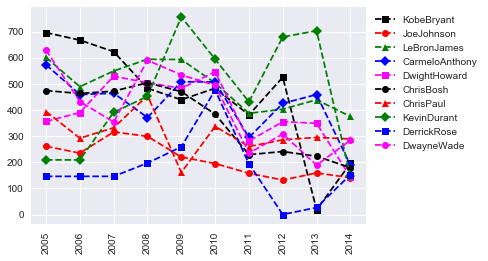

In [214]:
#Visualize the new matrices
myplot(FreeThrows)

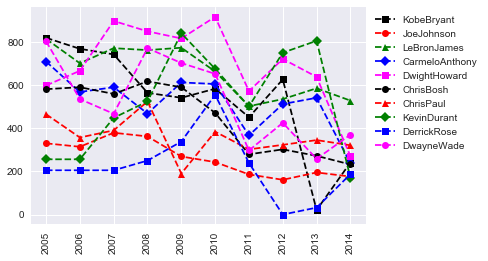

In [215]:
#Visualize the new matrices
myplot(FreeThrowAttempts)

### Part 1

In [216]:
#Free Throw Attempts Per Game 

#(You will need the Games matrix)
#Games 
KobeBryant_G = [80,77,82,82,73,82,58,78,6,35]
JoeJohnson_G = [82,57,82,79,76,72,60,72,79,80]
LeBronJames_G = [79,78,75,81,76,79,62,76,77,69]
CarmeloAnthony_G = [80,65,77,66,69,77,55,67,77,40]
DwightHoward_G = [82,82,82,79,82,78,54,76,71,41]
ChrisBosh_G = [70,69,67,77,70,77,57,74,79,44]
ChrisPaul_G = [78,64,80,78,45,80,60,70,62,82]
KevinDurant_G = [35,35,80,74,82,78,66,81,81,27]
DerrickRose_G = [40,40,40,81,78,81,39,0,10,51]
DwayneWade_G = [75,51,51,79,77,76,49,69,54,62]
#Matrix
Games = np.array([KobeBryant_G, JoeJohnson_G, LeBronJames_G, CarmeloAnthony_G, DwightHoward_G, ChrisBosh_G, ChrisPaul_G, KevinDurant_G, DerrickRose_G, DwayneWade_G])

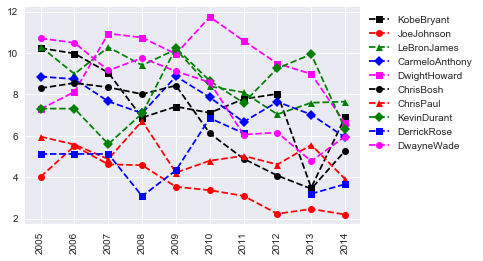

In [217]:
myplot(FreeThrowAttempts/Games)

Notice how Chris Paul gets few attempts per game

### Part 2

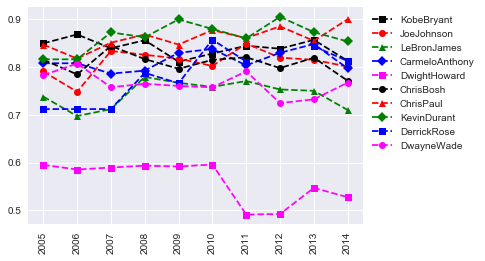

In [218]:
# Free Throw Accuracy
myplot(FreeThrows/FreeThrowAttempts)

And yet Chris Paul's accuracy is one of the highest Chances are his team would get more points if he had more FTA's.

Also notice that Dwight Howard's FT Accuracy is extremely poor compared to other players. If you recall, Dwight Howard's Field Goal Accuracy was exceptional:

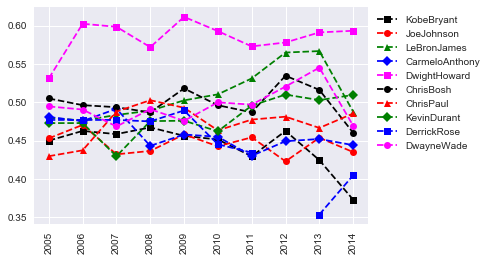

In [219]:
#Field Goals
KobeBryant_FG = [978,813,775,800,716,740,574,738,31,266]
JoeJohnson_FG = [632,536,647,620,635,514,423,445,462,446]
LeBronJames_FG = [875,772,794,789,768,758,621,765,767,624]
CarmeloAnthony_FG = [756,691,728,535,688,684,441,669,743,358]
DwightHoward_FG = [468,526,583,560,510,619,416,470,473,251]
ChrisBosh_FG = [549,543,507,615,600,524,393,485,492,343]
ChrisPaul_FG = [407,381,630,631,314,430,425,412,406,568]
KevinDurant_FG = [306,306,587,661,794,711,643,731,849,238]
DerrickRose_FG = [208,208,208,574,672,711,302,0,58,338]
DwayneWade_FG = [699,472,439,854,719,692,416,569,415,509]

#Matrix
FieldGoals  = np.array([KobeBryant_FG, JoeJohnson_FG, LeBronJames_FG, CarmeloAnthony_FG, DwightHoward_FG, ChrisBosh_FG, ChrisPaul_FG, KevinDurant_FG, DerrickRose_FG, DwayneWade_FG])

#Field Goal Attempts
KobeBryant_FGA = [2173,1757,1690,1712,1569,1639,1336,1595,73,713]
JoeJohnson_FGA = [1395,1139,1497,1420,1386,1161,931,1052,1018,1025]
LeBronJames_FGA = [1823,1621,1642,1613,1528,1485,1169,1354,1353,1279]
CarmeloAnthony_FGA = [1572,1453,1481,1207,1502,1503,1025,1489,1643,806]
DwightHoward_FGA = [881,873,974,979,834,1044,726,813,800,423]
ChrisBosh_FGA = [1087,1094,1027,1263,1158,1056,807,907,953,745]
ChrisPaul_FGA = [947,871,1291,1255,637,928,890,856,870,1170]
KevinDurant_FGA = [647,647,1366,1390,1668,1538,1297,1433,1688,467]
DerrickRose_FGA = [436,436,436,1208,1373,1597,695,0,164,835]
DwayneWade_FGA = [1413,962,937,1739,1511,1384,837,1093,761,1084]

#Matrix
FieldGoalAttempts = np.array([KobeBryant_FGA, JoeJohnson_FGA, LeBronJames_FGA, CarmeloAnthony_FGA, DwightHoward_FGA, ChrisBosh_FGA, ChrisPaul_FGA, KevinDurant_FGA, DerrickRose_FGA, DwayneWade_FGA])

myplot(FieldGoals/FieldGoalAttempts)

How could this be? Why is there such a drastic difference?

We will see just now...

### Part 3

In [220]:
#Points
KobeBryant_PTS = [2832,2430,2323,2201,1970,2078,1616,2133,83,782]
JoeJohnson_PTS = [1653,1426,1779,1688,1619,1312,1129,1170,1245,1154]
LeBronJames_PTS = [2478,2132,2250,2304,2258,2111,1683,2036,2089,1743]
CarmeloAnthony_PTS = [2122,1881,1978,1504,1943,1970,1245,1920,2112,966]
DwightHoward_PTS = [1292,1443,1695,1624,1503,1784,1113,1296,1297,646]
ChrisBosh_PTS = [1572,1561,1496,1746,1678,1438,1025,1232,1281,928]
ChrisPaul_PTS = [1258,1104,1684,1781,841,1268,1189,1186,1185,1564]
KevinDurant_PTS = [903,903,1624,1871,2472,2161,1850,2280,2593,686]
DerrickRose_PTS = [597,597,597,1361,1619,2026,852,0,159,904]
DwayneWade_PTS = [2040,1397,1254,2386,2045,1941,1082,1463,1028,1331]

#Matrix
Points = np.array([KobeBryant_PTS, JoeJohnson_PTS, LeBronJames_PTS, CarmeloAnthony_PTS, DwightHoward_PTS, ChrisBosh_PTS, ChrisPaul_PTS, KevinDurant_PTS, DerrickRose_PTS, DwayneWade_PTS])             

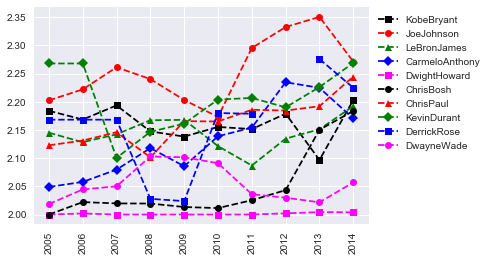

In [221]:
# Player Style Patterns Excluding Free Throws
myplot((Points-FreeThrows)/FieldGoals)

Because we have excluded free throws, this plot now shows us 
the true representation of player style change. We can verify
that this is the case because all the marks without exception
on this plot are between 2 and 3. That is because Field Goals
can only be for either 2 points or 3 points.

Insights:
1. You can see how players' preference for 2 or 3 point shots
   changes throughout their career. We can see that almost all
   players in this dataset experiment with their style throughout
   their careers. Perhaps, the most drastic change in style has
   been experienced by Joe Johnson.

2. There is one exception. You can see that one player has not
   changed his style at all - almost always scoring only 2-pointers.
   Who is this mystert player? It's Dwight Howard! 
   Now that explains a lot. The reason that Dwight Howard's
   Field Goal accuracy is so good is because he almost always
   scores 2-pointers only. That means he can be close to the basket
   or even in contact with it. Free throws, on the other hand require
   the player to stand 15ft (4.57m) away from the hoop. That's 
   probably why Dwight Howard's Free Throw Accuracy is poor.

---

Question 4 : The world bank was very impressed with your deliverables on the previous assignment and they have a new project for you.You are required to produce a scatterplot depicting Life Expectancy (y-axis) and Fertility Rate (x-axis) statistics by Country.
The scatterplot need to be categorised by Countries Regions.

You have been supplied with data for 2 years: 1960 and 2013 and you are requires to produce a visualisation for each of these years.
Some data has been provided in a CSV file, some in Python lists. The CSV file contains combined data for both years. All data manipulations have to be performed in Python (not in Excel) because this project can be audited at the later stage.
You also have been requested to provide insights into how the two periods compare

Country code and life expectancy at birth in 1960 and 2013

In [222]:
# Copy the code inside cell below and paste/run in your notebook to generate three new lists
Country_Code = list (["ABW","AFG","AGO","ALB","ARE","ARG","ARM","ATG","AUS","AUT","AZE","BDI","BEL","BEN","BFA","BGD","BGR","BHR","BHS","BIH","BLR","BLZ","BOL","BRA","BRB","BRN","BTN","BWA","CAF","CAN","CHE","CHL","CHN","CIV","CMR","COG","COL","COM","CPV","CRI","CUB","CYP","CZE","DEU","DJI","DNK","DOM","DZA","ECU","EGY","ERI","ESP","EST","ETH","FIN","FJI","FRA","FSM","GAB","GBR","GEO","GHA","GIN","GMB","GNB","GNQ","GRC","GRD","GTM","GUM","GUY","HKG","HND","HRV","HTI","HUN","IDN","IND","IRL","IRN","IRQ","ISL","ITA","JAM","JOR","JPN","KAZ","KEN","KGZ","KHM","KIR","KOR","KWT","LAO","LBN","LBR","LBY","LCA","LKA","LSO","LTU","LUX","LVA","MAC","MAR","MDA","MDG","MDV","MEX","MKD","MLI","MLT","MMR","MNE","MNG","MOZ","MRT","MUS","MWI","MYS","NAM","NCL","NER","NGA","NIC","NLD","NOR","NPL","NZL","OMN","PAK","PAN","PER","PHL","PNG","POL","PRI","PRT","PRY","PYF","QAT","ROU","RUS","RWA","SAU","SDN","SEN","SGP","SLB","SLE","SLV","SOM","SSD","STP","SUR","SVK","SVN","SWE","SWZ","SYR","TCD","TGO","THA","TJK","TKM","TLS","TON","TTO","TUN","TUR","TZA","UGA","UKR","URY","USA","UZB","VCT","VEN","VIR","VNM","VUT","WSM","YEM","ZAF","COD","ZMB","ZWE"])
Life_Expectancy_At_Birth_1960 = list ([65.5693658536586,32.328512195122,32.9848292682927,62.2543658536585,52.2432195121951,65.2155365853659,65.8634634146342,61.7827317073171,70.8170731707317,68.5856097560976,60.836243902439,41.2360487804878,69.7019512195122,37.2782682926829,34.4779024390244,45.8293170731707,69.2475609756098,52.0893658536585,62.7290487804878,60.2762195121951,67.7080975609756,59.9613658536585,42.1183170731707,54.2054634146342,60.7380487804878,62.5003658536585,32.3593658536585,50.5477317073171,36.4826341463415,71.1331707317073,71.3134146341463,57.4582926829268,43.4658048780488,36.8724146341463,41.523756097561,48.5816341463415,56.716756097561,41.4424390243903,48.8564146341463,60.5761951219512,63.9046585365854,69.5939268292683,70.3487804878049,69.3129512195122,44.0212682926829,72.1765853658537,51.8452682926829,46.1351219512195,53.215,48.0137073170732,37.3629024390244,69.1092682926829,67.9059756097561,38.4057073170732,68.819756097561,55.9584878048781,69.8682926829268,57.5865853658537,39.5701219512195,71.1268292682927,63.4318536585366,45.8314634146342,34.8863902439024,32.0422195121951,37.8404390243902,36.7330487804878,68.1639024390244,59.8159268292683,45.5316341463415,61.2263414634146,60.2787317073171,66.9997073170732,46.2883170731707,64.6086585365854,42.1000975609756,68.0031707317073,48.6403170731707,41.1719512195122,69.691756097561,44.945512195122,48.0306829268293,73.4286585365854,69.1239024390244,64.1918292682927,52.6852682926829,67.6660975609756,58.3675853658537,46.3624146341463,56.1280731707317,41.2320243902439,49.2159756097561,53.0013170731707,60.3479512195122,43.2044634146342,63.2801219512195,34.7831707317073,42.6411951219512,57.303756097561,59.7471463414634,46.5107073170732,69.8473170731707,68.4463902439024,69.7868292682927,64.6609268292683,48.4466341463415,61.8127804878049,39.9746829268293,37.2686341463415,57.0656341463415,60.6228048780488,28.2116097560976,67.6017804878049,42.7363902439024,63.7056097560976,48.3688048780488,35.0037073170732,43.4830975609756,58.7452195121951,37.7736341463415,59.4753414634146,46.8803902439024,58.6390243902439,35.5150487804878,37.1829512195122,46.9988292682927,73.3926829268293,73.549756097561,35.1708292682927,71.2365853658537,42.6670731707317,45.2904634146342,60.8817073170732,47.6915853658537,57.8119268292683,38.462243902439,67.6804878048781,68.7196097560976,62.8089268292683,63.7937073170732,56.3570487804878,61.2060731707317,65.6424390243903,66.0552926829268,42.2492926829268,45.6662682926829,48.1876341463415,38.206,65.6598292682927,49.3817073170732,30.3315365853659,49.9479268292683,36.9658780487805,31.6767073170732,50.4513658536585,59.6801219512195,69.9759268292683,68.9780487804878,73.0056097560976,44.2337804878049,52.768243902439,38.0161219512195,40.2728292682927,54.6993170731707,56.1535365853659,54.4586829268293,33.7271219512195,61.3645365853659,62.6575853658537,42.009756097561,45.3844146341463,43.6538780487805,43.9835609756098,68.2995365853659,67.8963902439025,69.7707317073171,58.8855365853659,57.7238780487805,59.2851219512195,63.7302195121951,59.0670243902439,46.4874878048781,49.969512195122,34.3638048780488,49.0362926829268,41.0180487804878,45.1098048780488,51.5424634146342])
Life_Expectancy_At_Birth_2013 = list ([75.3286585365854,60.0282682926829,51.8661707317073,77.537243902439,77.1956341463415,75.9860975609756,74.5613658536585,75.7786585365854,82.1975609756098,80.890243902439,70.6931463414634,56.2516097560976,80.3853658536585,59.3120243902439,58.2406341463415,71.245243902439,74.4658536585366,76.5459512195122,75.0735365853659,76.2769268292683,72.4707317073171,69.9820487804878,67.9134390243903,74.1224390243903,75.3339512195122,78.5466585365854,69.1029268292683,64.3608048780488,49.8798780487805,81.4011219512195,82.7487804878049,81.1979268292683,75.3530243902439,51.2084634146342,55.0418048780488,61.6663902439024,73.8097317073171,62.9321707317073,72.9723658536585,79.2252195121951,79.2563902439025,79.9497804878049,78.2780487804878,81.0439024390244,61.6864634146342,80.3024390243903,73.3199024390244,74.5689512195122,75.648512195122,70.9257804878049,63.1778780487805,82.4268292682927,76.4243902439025,63.4421951219512,80.8317073170732,69.9179268292683,81.9682926829268,68.9733902439024,63.8435853658537,80.9560975609756,74.079512195122,61.1420731707317,58.216487804878,59.9992682926829,54.8384146341464,57.2908292682927,80.6341463414634,73.1935609756098,71.4863902439024,78.872512195122,66.3100243902439,83.8317073170732,72.9428536585366,77.1268292682927,62.4011463414634,75.2682926829268,68.7046097560976,67.6604146341463,81.0439024390244,75.1259756097561,69.4716829268293,83.1170731707317,82.290243902439,73.4689268292683,73.9014146341463,83.3319512195122,70.45,60.9537804878049,70.2024390243902,67.7720487804878,65.7665853658537,81.459756097561,74.462756097561,65.687243902439,80.1288780487805,60.5203902439024,71.6576829268293,74.9127073170732,74.2402926829268,49.3314634146342,74.1634146341464,81.7975609756098,73.9804878048781,80.3391463414634,73.7090487804878,68.811512195122,64.6739024390244,76.6026097560976,76.5326585365854,75.1870487804878,57.5351951219512,80.7463414634146,65.6540975609756,74.7583658536585,69.0618048780488,54.641512195122,62.8027073170732,74.46,61.466,74.567512195122,64.3438780487805,77.1219512195122,60.8281463414634,52.4421463414634,74.514756097561,81.1048780487805,81.4512195121951,69.222,81.4073170731707,76.8410487804878,65.9636829268293,77.4192195121951,74.2838536585366,68.1315609756097,62.4491707317073,76.8487804878049,78.7111951219512,80.3731707317073,72.7991707317073,76.3340731707317,78.4184878048781,74.4634146341463,71.0731707317073,63.3948292682927,74.1776341463415,63.1670487804878,65.878756097561,82.3463414634146,67.7189268292683,50.3631219512195,72.4981463414634,55.0230243902439,55.2209024390244,66.259512195122,70.99,76.2609756097561,80.2780487804878,81.7048780487805,48.9379268292683,74.7157804878049,51.1914878048781,59.1323658536585,74.2469268292683,69.4001707317073,65.4565609756098,67.5223658536585,72.6403414634147,70.3052926829268,73.6463414634147,75.1759512195122,64.2918292682927,57.7676829268293,71.159512195122,76.8361951219512,78.8414634146341,68.2275853658537,72.8108780487805,74.0744146341464,79.6243902439024,75.756487804878,71.669243902439,73.2503902439024,63.583512195122,56.7365853658537,58.2719268292683,59.2373658536585,55.633])

Country names, codes and regions dataset

In [223]:
# Copy the code inside cell below and paste/run in your notebook to generate three new lists
Countries_2012_Dataset = list (["Aruba","Afghanistan","Angola","Albania","United Arab Emirates","Argentina","Armenia","Antigua and Barbuda","Australia","Austria","Azerbaijan","Burundi","Belgium","Benin","Burkina Faso","Bangladesh","Bulgaria","Bahrain","Bahamas, The","Bosnia and Herzegovina","Belarus","Belize","Bermuda","Bolivia","Brazil","Barbados","Brunei Darussalam","Bhutan","Botswana","Central African Republic","Canada","Switzerland","Chile","China","Cote d'Ivoire","Cameroon","Congo, Rep.","Colombia","Comoros","Cabo Verde","Costa Rica","Cuba","Cayman Islands","Cyprus","Czech Republic","Germany","Djibouti","Denmark","Dominican Republic","Algeria","Ecuador","Egypt, Arab Rep.","Eritrea","Spain","Estonia","Ethiopia","Finland","Fiji","France","Micronesia, Fed. Sts.","Gabon","United Kingdom","Georgia","Ghana","Guinea","Gambia, The","Guinea-Bissau","Equatorial Guinea","Greece","Grenada","Greenland","Guatemala","Guam","Guyana","Hong Kong SAR, China","Honduras","Croatia","Haiti","Hungary","Indonesia","India","Ireland","Iran, Islamic Rep.","Iraq","Iceland","Israel","Italy","Jamaica","Jordan","Japan","Kazakhstan","Kenya","Kyrgyz Republic","Cambodia","Kiribati","Korea, Rep.","Kuwait","Lao PDR","Lebanon","Liberia","Libya","St. Lucia","Liechtenstein","Sri Lanka","Lesotho","Lithuania","Luxembourg","Latvia","Macao SAR, China","Morocco","Moldova","Madagascar","Maldives","Mexico","Macedonia, FYR","Mali","Malta","Myanmar","Montenegro","Mongolia","Mozambique","Mauritania","Mauritius","Malawi","Malaysia","Namibia","New Caledonia","Niger","Nigeria","Nicaragua","Netherlands","Norway","Nepal","New Zealand","Oman","Pakistan","Panama","Peru","Philippines","Papua New Guinea","Poland","Puerto Rico","Portugal","Paraguay","French Polynesia","Qatar","Romania","Russian Federation","Rwanda","Saudi Arabia","Sudan","Senegal","Singapore","Solomon Islands","Sierra Leone","El Salvador","Somalia","Serbia","South Sudan","Sao Tome and Principe","Suriname","Slovak Republic","Slovenia","Sweden","Swaziland","Seychelles","Syrian Arab Republic","Chad","Togo","Thailand","Tajikistan","Turkmenistan","Timor-Leste","Tonga","Trinidad and Tobago","Tunisia","Turkey","Tanzania","Uganda","Ukraine","Uruguay","United States","Uzbekistan","St. Vincent and the Grenadines","Venezuela, RB","Virgin Islands (U.S.)","Vietnam","Vanuatu","West Bank and Gaza","Samoa","Yemen, Rep.","South Africa","Congo, Dem. Rep.","Zambia","Zimbabwe"])
Codes_2012_Dataset = list (["ABW","AFG","AGO","ALB","ARE","ARG","ARM","ATG","AUS","AUT","AZE","BDI","BEL","BEN","BFA","BGD","BGR","BHR","BHS","BIH","BLR","BLZ","BMU","BOL","BRA","BRB","BRN","BTN","BWA","CAF","CAN","CHE","CHL","CHN","CIV","CMR","COG","COL","COM","CPV","CRI","CUB","CYM","CYP","CZE","DEU","DJI","DNK","DOM","DZA","ECU","EGY","ERI","ESP","EST","ETH","FIN","FJI","FRA","FSM","GAB","GBR","GEO","GHA","GIN","GMB","GNB","GNQ","GRC","GRD","GRL","GTM","GUM","GUY","HKG","HND","HRV","HTI","HUN","IDN","IND","IRL","IRN","IRQ","ISL","ISR","ITA","JAM","JOR","JPN","KAZ","KEN","KGZ","KHM","KIR","KOR","KWT","LAO","LBN","LBR","LBY","LCA","LIE","LKA","LSO","LTU","LUX","LVA","MAC","MAR","MDA","MDG","MDV","MEX","MKD","MLI","MLT","MMR","MNE","MNG","MOZ","MRT","MUS","MWI","MYS","NAM","NCL","NER","NGA","NIC","NLD","NOR","NPL","NZL","OMN","PAK","PAN","PER","PHL","PNG","POL","PRI","PRT","PRY","PYF","QAT","ROU","RUS","RWA","SAU","SDN","SEN","SGP","SLB","SLE","SLV","SOM","SRB","SSD","STP","SUR","SVK","SVN","SWE","SWZ","SYC","SYR","TCD","TGO","THA","TJK","TKM","TLS","TON","TTO","TUN","TUR","TZA","UGA","UKR","URY","USA","UZB","VCT","VEN","VIR","VNM","VUT","PSE","WSM","YEM","ZAF","COD","ZMB","ZWE"])
Regions_2012_Dataset = list (["The Americas","Asia","Africa","Europe","Middle East","The Americas","Asia","The Americas","Oceania","Europe","Asia","Africa","Europe","Africa","Africa","Asia","Europe","Middle East","The Americas","Europe","Europe","The Americas","The Americas","The Americas","The Americas","The Americas","Asia","Asia","Africa","Africa","The Americas","Europe","The Americas","Asia","Africa","Africa","Africa","The Americas","Africa","Africa","The Americas","The Americas","The Americas","Europe","Europe","Europe","Africa","Europe","The Americas","Africa","The Americas","Africa","Africa","Europe","Europe","Africa","Europe","Oceania","Europe","Oceania","Africa","Europe","Asia","Africa","Africa","Africa","Africa","Africa","Europe","The Americas","The Americas","The Americas","Oceania","The Americas","Asia","The Americas","Europe","The Americas","Europe","Asia","Asia","Europe","Middle East","Middle East","Europe","Middle East","Europe","The Americas","Middle East","Asia","Asia","Africa","Asia","Asia","Oceania","Asia","Middle East","Asia","Middle East","Africa","Africa","The Americas","Europe","Asia","Africa","Europe","Europe","Europe","Asia","Africa","Europe","Africa","Asia","The Americas","Europe","Africa","Europe","Asia","Europe","Asia","Africa","Africa","Africa","Africa","Asia","Africa","Oceania","Africa","Africa","The Americas","Europe","Europe","Asia","Oceania","Middle East","Asia","The Americas","The Americas","Asia","Oceania","Europe","The Americas","Europe","The Americas","Oceania","Middle East","Europe","Europe","Africa","Middle East","Africa","Africa","Asia","Oceania","Africa","The Americas","Africa","Europe","Africa","Africa","The Americas","Europe","Europe","Europe","Africa","Africa","Middle East","Africa","Africa","Asia","Asia","Asia","Asia","Oceania","The Americas","Africa","Europe","Africa","Africa","Europe","The Americas","The Americas","Asia","The Americas","The Americas","The Americas","Asia","Oceania","Middle East","Oceania","Middle East","Africa","Africa","Africa","Africa"])


Import the packages needed to perform the analysis

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

Load the data provided for the exercise

In [225]:
# Import the csv dataset
data = pd.read_csv("DemographicData.csv")

Explore the data

In [226]:
# Visualize the dataframe
data

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.90000,High income
1,Afghanistan,AFG,35.253,5.90000,Low income
2,Angola,AGO,45.985,19.10000,Upper middle income
3,Albania,ALB,12.877,57.20000,Upper middle income
4,United Arab Emirates,ARE,11.044,88.00000,High income
5,Argentina,ARG,17.716,59.90000,High income
6,Armenia,ARM,13.308,41.90000,Lower middle income
7,Antigua and Barbuda,ATG,16.447,63.40000,High income
8,Australia,AUS,13.200,83.00000,High income
9,Austria,AUT,9.400,80.61880,High income


In [227]:
# Rename the column names
data.columns = ['CountryName', 'CountryCode', 'BirthRate', 'InternetUsers', 'IncomeGroup']

In [228]:
# Check top 6 rows
data.head(6)

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
5,Argentina,ARG,17.716,59.9,High income


In [229]:
# Check bottom 7 rows
data.tail(7)

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
188,West Bank and Gaza,PSE,30.394,46.6,Lower middle income
189,Samoa,WSM,26.172,15.3,Lower middle income
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income
194,Zimbabwe,ZWE,35.715,18.5,Low income


In [230]:
# Check the structure of the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
CountryName      195 non-null object
CountryCode      195 non-null object
BirthRate        195 non-null float64
InternetUsers    195 non-null float64
IncomeGroup      195 non-null object
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


In [231]:
# Check the summary of the data
data.describe()

,BirthRate,InternetUsers
count,195.000000,195.000000
mean,21.469928,42.076471
std,10.605467,29.030788
min,7.900000,0.900000
25%,12.120500,14.520000
50%,19.680000,41.000000
75%,29.759500,66.225000
max,49.661000,96.546800


**Request 1**

You are employed as a Data Scientist by the World Bank and you are working on a project to analyse the World’s demographic trends.You are required to produce a scatterplot illustrating Birth Rate and Internet Usage statistics by Country.
The scatterplot needs to also be categorised by Countries’ Income Groups.

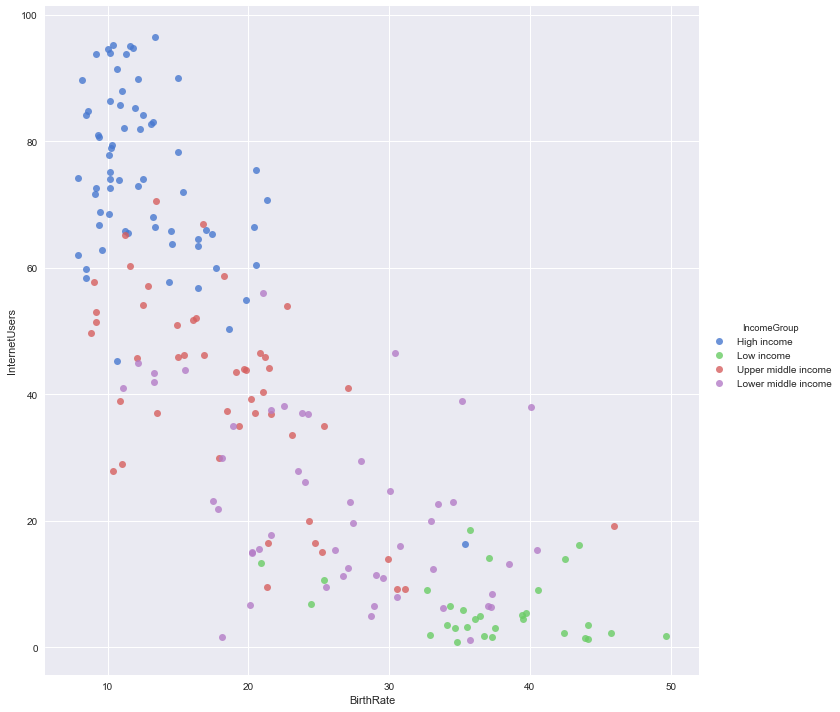

In [232]:
# Plot the BirthRate versus Internet Users categorized by Income Group
vis1 = sns.lmplot( data = data, x = 'BirthRate', y = 'InternetUsers', fit_reg = False, hue = 'IncomeGroup', size = 10 )

**Request 2**

You have received an urgent update from your manager.

You are required to produce a second scatterplot also illustrating Birth Rate and Internet Usage statistics by Country.

However, this time the scatterplot needs to be categorised by Countries’ Regions.

Additional data has been supplied in the form of lists.

In [233]:
# Copy the code inside cell below and paste/run in your notebook to generate three new lists
Countries_2012_Dataset = list (["Aruba","Afghanistan","Angola","Albania","United Arab Emirates","Argentina","Armenia","Antigua and Barbuda","Australia","Austria","Azerbaijan","Burundi","Belgium","Benin","Burkina Faso","Bangladesh","Bulgaria","Bahrain","Bahamas, The","Bosnia and Herzegovina","Belarus","Belize","Bermuda","Bolivia","Brazil","Barbados","Brunei Darussalam","Bhutan","Botswana","Central African Republic","Canada","Switzerland","Chile","China","Cote d'Ivoire","Cameroon","Congo, Rep.","Colombia","Comoros","Cabo Verde","Costa Rica","Cuba","Cayman Islands","Cyprus","Czech Republic","Germany","Djibouti","Denmark","Dominican Republic","Algeria","Ecuador","Egypt, Arab Rep.","Eritrea","Spain","Estonia","Ethiopia","Finland","Fiji","France","Micronesia, Fed. Sts.","Gabon","United Kingdom","Georgia","Ghana","Guinea","Gambia, The","Guinea-Bissau","Equatorial Guinea","Greece","Grenada","Greenland","Guatemala","Guam","Guyana","Hong Kong SAR, China","Honduras","Croatia","Haiti","Hungary","Indonesia","India","Ireland","Iran, Islamic Rep.","Iraq","Iceland","Israel","Italy","Jamaica","Jordan","Japan","Kazakhstan","Kenya","Kyrgyz Republic","Cambodia","Kiribati","Korea, Rep.","Kuwait","Lao PDR","Lebanon","Liberia","Libya","St. Lucia","Liechtenstein","Sri Lanka","Lesotho","Lithuania","Luxembourg","Latvia","Macao SAR, China","Morocco","Moldova","Madagascar","Maldives","Mexico","Macedonia, FYR","Mali","Malta","Myanmar","Montenegro","Mongolia","Mozambique","Mauritania","Mauritius","Malawi","Malaysia","Namibia","New Caledonia","Niger","Nigeria","Nicaragua","Netherlands","Norway","Nepal","New Zealand","Oman","Pakistan","Panama","Peru","Philippines","Papua New Guinea","Poland","Puerto Rico","Portugal","Paraguay","French Polynesia","Qatar","Romania","Russian Federation","Rwanda","Saudi Arabia","Sudan","Senegal","Singapore","Solomon Islands","Sierra Leone","El Salvador","Somalia","Serbia","South Sudan","Sao Tome and Principe","Suriname","Slovak Republic","Slovenia","Sweden","Swaziland","Seychelles","Syrian Arab Republic","Chad","Togo","Thailand","Tajikistan","Turkmenistan","Timor-Leste","Tonga","Trinidad and Tobago","Tunisia","Turkey","Tanzania","Uganda","Ukraine","Uruguay","United States","Uzbekistan","St. Vincent and the Grenadines","Venezuela, RB","Virgin Islands (U.S.)","Vietnam","Vanuatu","West Bank and Gaza","Samoa","Yemen, Rep.","South Africa","Congo, Dem. Rep.","Zambia","Zimbabwe"])
Codes_2012_Dataset = list (["ABW","AFG","AGO","ALB","ARE","ARG","ARM","ATG","AUS","AUT","AZE","BDI","BEL","BEN","BFA","BGD","BGR","BHR","BHS","BIH","BLR","BLZ","BMU","BOL","BRA","BRB","BRN","BTN","BWA","CAF","CAN","CHE","CHL","CHN","CIV","CMR","COG","COL","COM","CPV","CRI","CUB","CYM","CYP","CZE","DEU","DJI","DNK","DOM","DZA","ECU","EGY","ERI","ESP","EST","ETH","FIN","FJI","FRA","FSM","GAB","GBR","GEO","GHA","GIN","GMB","GNB","GNQ","GRC","GRD","GRL","GTM","GUM","GUY","HKG","HND","HRV","HTI","HUN","IDN","IND","IRL","IRN","IRQ","ISL","ISR","ITA","JAM","JOR","JPN","KAZ","KEN","KGZ","KHM","KIR","KOR","KWT","LAO","LBN","LBR","LBY","LCA","LIE","LKA","LSO","LTU","LUX","LVA","MAC","MAR","MDA","MDG","MDV","MEX","MKD","MLI","MLT","MMR","MNE","MNG","MOZ","MRT","MUS","MWI","MYS","NAM","NCL","NER","NGA","NIC","NLD","NOR","NPL","NZL","OMN","PAK","PAN","PER","PHL","PNG","POL","PRI","PRT","PRY","PYF","QAT","ROU","RUS","RWA","SAU","SDN","SEN","SGP","SLB","SLE","SLV","SOM","SRB","SSD","STP","SUR","SVK","SVN","SWE","SWZ","SYC","SYR","TCD","TGO","THA","TJK","TKM","TLS","TON","TTO","TUN","TUR","TZA","UGA","UKR","URY","USA","UZB","VCT","VEN","VIR","VNM","VUT","PSE","WSM","YEM","ZAF","COD","ZMB","ZWE"])
Regions_2012_Dataset = list (["The Americas","Asia","Africa","Europe","Middle East","The Americas","Asia","The Americas","Oceania","Europe","Asia","Africa","Europe","Africa","Africa","Asia","Europe","Middle East","The Americas","Europe","Europe","The Americas","The Americas","The Americas","The Americas","The Americas","Asia","Asia","Africa","Africa","The Americas","Europe","The Americas","Asia","Africa","Africa","Africa","The Americas","Africa","Africa","The Americas","The Americas","The Americas","Europe","Europe","Europe","Africa","Europe","The Americas","Africa","The Americas","Africa","Africa","Europe","Europe","Africa","Europe","Oceania","Europe","Oceania","Africa","Europe","Asia","Africa","Africa","Africa","Africa","Africa","Europe","The Americas","The Americas","The Americas","Oceania","The Americas","Asia","The Americas","Europe","The Americas","Europe","Asia","Asia","Europe","Middle East","Middle East","Europe","Middle East","Europe","The Americas","Middle East","Asia","Asia","Africa","Asia","Asia","Oceania","Asia","Middle East","Asia","Middle East","Africa","Africa","The Americas","Europe","Asia","Africa","Europe","Europe","Europe","Asia","Africa","Europe","Africa","Asia","The Americas","Europe","Africa","Europe","Asia","Europe","Asia","Africa","Africa","Africa","Africa","Asia","Africa","Oceania","Africa","Africa","The Americas","Europe","Europe","Asia","Oceania","Middle East","Asia","The Americas","The Americas","Asia","Oceania","Europe","The Americas","Europe","The Americas","Oceania","Middle East","Europe","Europe","Africa","Middle East","Africa","Africa","Asia","Oceania","Africa","The Americas","Africa","Europe","Africa","Africa","The Americas","Europe","Europe","Europe","Africa","Africa","Middle East","Africa","Africa","Asia","Asia","Asia","Asia","Oceania","The Americas","Africa","Europe","Africa","Africa","Europe","The Americas","The Americas","Asia","The Americas","The Americas","The Americas","Asia","Oceania","Middle East","Oceania","Middle East","Africa","Africa","Africa","Africa"])


In [234]:
# Create the dataframe
country_data = pd.DataFrame({'CountryName': np.array(Countries_2012_Dataset), 
                             'CountryCode': np.array(Codes_2012_Dataset),
                             'CountryRegion': np.array(Regions_2012_Dataset)})

In [235]:
# Explore the dataset
country_data.head()

,CountryCode,CountryName,CountryRegion
0,ABW,Aruba,The Americas
1,AFG,Afghanistan,Asia
2,AGO,Angola,Africa
3,ALB,Albania,Europe
4,ARE,United Arab Emirates,Middle East


In [236]:
data.head()

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


In [237]:
# Merge the country data to the original dataframe
merged_data = pd.merge(left=data, right=country_data, how='inner', on="CountryCode")

In [238]:
# Explore the dataset
merged_data.head()

,CountryName_x,CountryCode,BirthRate,InternetUsers,IncomeGroup,CountryName_y,CountryRegion
0,Aruba,ABW,10.244,78.9,High income,Aruba,The Americas
1,Afghanistan,AFG,35.253,5.9,Low income,Afghanistan,Asia
2,Angola,AGO,45.985,19.1,Upper middle income,Angola,Africa
3,Albania,ALB,12.877,57.2,Upper middle income,Albania,Europe
4,United Arab Emirates,ARE,11.044,88.0,High income,United Arab Emirates,Middle East


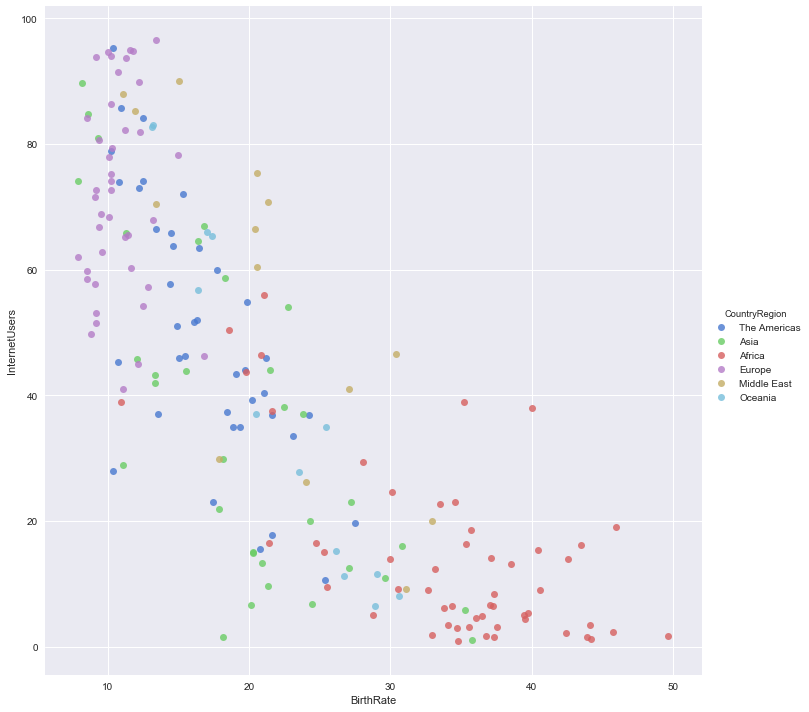

In [239]:
# Plot the BirthRate versus Internet Users cathegorized by Country Region
vis2 = sns.lmplot( data = merged_data, x = 'BirthRate', y = 'InternetUsers', fit_reg = False, hue = 'CountryRegion', size = 10 )

** Challenge**

The world bank was very impressed with your deliverables on the previous assignment and they have a new project for you.

You are required to produce a scatterplot depicting Life Expectancy (y-axis) and Fertility Rate (x-axis) statistics by Country.

The scatterplot need to be categorised by Countries Regions.

You have been supplied with data for 2 years: 1960 and 2013 and you are requires to produce a visualisation for each of these years.

Some data has been provided in a CSV file, some in Python lists. All data manipulations have to be performed in Python (not in Excel) because this project can be audited at the later stage.

You also have been requested to provide insights into how the two periods compare.

In [240]:
# Copy the code inside cell below and paste/run in your notebook to generate three new lists
Country_Code = list (["ABW","AFG","AGO","ALB","ARE","ARG","ARM","ATG","AUS","AUT","AZE","BDI","BEL","BEN","BFA","BGD","BGR","BHR","BHS","BIH","BLR","BLZ","BOL","BRA","BRB","BRN","BTN","BWA","CAF","CAN","CHE","CHL","CHN","CIV","CMR","COG","COL","COM","CPV","CRI","CUB","CYP","CZE","DEU","DJI","DNK","DOM","DZA","ECU","EGY","ERI","ESP","EST","ETH","FIN","FJI","FRA","FSM","GAB","GBR","GEO","GHA","GIN","GMB","GNB","GNQ","GRC","GRD","GTM","GUM","GUY","HKG","HND","HRV","HTI","HUN","IDN","IND","IRL","IRN","IRQ","ISL","ITA","JAM","JOR","JPN","KAZ","KEN","KGZ","KHM","KIR","KOR","KWT","LAO","LBN","LBR","LBY","LCA","LKA","LSO","LTU","LUX","LVA","MAC","MAR","MDA","MDG","MDV","MEX","MKD","MLI","MLT","MMR","MNE","MNG","MOZ","MRT","MUS","MWI","MYS","NAM","NCL","NER","NGA","NIC","NLD","NOR","NPL","NZL","OMN","PAK","PAN","PER","PHL","PNG","POL","PRI","PRT","PRY","PYF","QAT","ROU","RUS","RWA","SAU","SDN","SEN","SGP","SLB","SLE","SLV","SOM","SSD","STP","SUR","SVK","SVN","SWE","SWZ","SYR","TCD","TGO","THA","TJK","TKM","TLS","TON","TTO","TUN","TUR","TZA","UGA","UKR","URY","USA","UZB","VCT","VEN","VIR","VNM","VUT","WSM","YEM","ZAF","COD","ZMB","ZWE"])
Life_Expectancy_At_Birth_1960 = list ([65.5693658536586,32.328512195122,32.9848292682927,62.2543658536585,52.2432195121951,65.2155365853659,65.8634634146342,61.7827317073171,70.8170731707317,68.5856097560976,60.836243902439,41.2360487804878,69.7019512195122,37.2782682926829,34.4779024390244,45.8293170731707,69.2475609756098,52.0893658536585,62.7290487804878,60.2762195121951,67.7080975609756,59.9613658536585,42.1183170731707,54.2054634146342,60.7380487804878,62.5003658536585,32.3593658536585,50.5477317073171,36.4826341463415,71.1331707317073,71.3134146341463,57.4582926829268,43.4658048780488,36.8724146341463,41.523756097561,48.5816341463415,56.716756097561,41.4424390243903,48.8564146341463,60.5761951219512,63.9046585365854,69.5939268292683,70.3487804878049,69.3129512195122,44.0212682926829,72.1765853658537,51.8452682926829,46.1351219512195,53.215,48.0137073170732,37.3629024390244,69.1092682926829,67.9059756097561,38.4057073170732,68.819756097561,55.9584878048781,69.8682926829268,57.5865853658537,39.5701219512195,71.1268292682927,63.4318536585366,45.8314634146342,34.8863902439024,32.0422195121951,37.8404390243902,36.7330487804878,68.1639024390244,59.8159268292683,45.5316341463415,61.2263414634146,60.2787317073171,66.9997073170732,46.2883170731707,64.6086585365854,42.1000975609756,68.0031707317073,48.6403170731707,41.1719512195122,69.691756097561,44.945512195122,48.0306829268293,73.4286585365854,69.1239024390244,64.1918292682927,52.6852682926829,67.6660975609756,58.3675853658537,46.3624146341463,56.1280731707317,41.2320243902439,49.2159756097561,53.0013170731707,60.3479512195122,43.2044634146342,63.2801219512195,34.7831707317073,42.6411951219512,57.303756097561,59.7471463414634,46.5107073170732,69.8473170731707,68.4463902439024,69.7868292682927,64.6609268292683,48.4466341463415,61.8127804878049,39.9746829268293,37.2686341463415,57.0656341463415,60.6228048780488,28.2116097560976,67.6017804878049,42.7363902439024,63.7056097560976,48.3688048780488,35.0037073170732,43.4830975609756,58.7452195121951,37.7736341463415,59.4753414634146,46.8803902439024,58.6390243902439,35.5150487804878,37.1829512195122,46.9988292682927,73.3926829268293,73.549756097561,35.1708292682927,71.2365853658537,42.6670731707317,45.2904634146342,60.8817073170732,47.6915853658537,57.8119268292683,38.462243902439,67.6804878048781,68.7196097560976,62.8089268292683,63.7937073170732,56.3570487804878,61.2060731707317,65.6424390243903,66.0552926829268,42.2492926829268,45.6662682926829,48.1876341463415,38.206,65.6598292682927,49.3817073170732,30.3315365853659,49.9479268292683,36.9658780487805,31.6767073170732,50.4513658536585,59.6801219512195,69.9759268292683,68.9780487804878,73.0056097560976,44.2337804878049,52.768243902439,38.0161219512195,40.2728292682927,54.6993170731707,56.1535365853659,54.4586829268293,33.7271219512195,61.3645365853659,62.6575853658537,42.009756097561,45.3844146341463,43.6538780487805,43.9835609756098,68.2995365853659,67.8963902439025,69.7707317073171,58.8855365853659,57.7238780487805,59.2851219512195,63.7302195121951,59.0670243902439,46.4874878048781,49.969512195122,34.3638048780488,49.0362926829268,41.0180487804878,45.1098048780488,51.5424634146342])
Life_Expectancy_At_Birth_2013 = list ([75.3286585365854,60.0282682926829,51.8661707317073,77.537243902439,77.1956341463415,75.9860975609756,74.5613658536585,75.7786585365854,82.1975609756098,80.890243902439,70.6931463414634,56.2516097560976,80.3853658536585,59.3120243902439,58.2406341463415,71.245243902439,74.4658536585366,76.5459512195122,75.0735365853659,76.2769268292683,72.4707317073171,69.9820487804878,67.9134390243903,74.1224390243903,75.3339512195122,78.5466585365854,69.1029268292683,64.3608048780488,49.8798780487805,81.4011219512195,82.7487804878049,81.1979268292683,75.3530243902439,51.2084634146342,55.0418048780488,61.6663902439024,73.8097317073171,62.9321707317073,72.9723658536585,79.2252195121951,79.2563902439025,79.9497804878049,78.2780487804878,81.0439024390244,61.6864634146342,80.3024390243903,73.3199024390244,74.5689512195122,75.648512195122,70.9257804878049,63.1778780487805,82.4268292682927,76.4243902439025,63.4421951219512,80.8317073170732,69.9179268292683,81.9682926829268,68.9733902439024,63.8435853658537,80.9560975609756,74.079512195122,61.1420731707317,58.216487804878,59.9992682926829,54.8384146341464,57.2908292682927,80.6341463414634,73.1935609756098,71.4863902439024,78.872512195122,66.3100243902439,83.8317073170732,72.9428536585366,77.1268292682927,62.4011463414634,75.2682926829268,68.7046097560976,67.6604146341463,81.0439024390244,75.1259756097561,69.4716829268293,83.1170731707317,82.290243902439,73.4689268292683,73.9014146341463,83.3319512195122,70.45,60.9537804878049,70.2024390243902,67.7720487804878,65.7665853658537,81.459756097561,74.462756097561,65.687243902439,80.1288780487805,60.5203902439024,71.6576829268293,74.9127073170732,74.2402926829268,49.3314634146342,74.1634146341464,81.7975609756098,73.9804878048781,80.3391463414634,73.7090487804878,68.811512195122,64.6739024390244,76.6026097560976,76.5326585365854,75.1870487804878,57.5351951219512,80.7463414634146,65.6540975609756,74.7583658536585,69.0618048780488,54.641512195122,62.8027073170732,74.46,61.466,74.567512195122,64.3438780487805,77.1219512195122,60.8281463414634,52.4421463414634,74.514756097561,81.1048780487805,81.4512195121951,69.222,81.4073170731707,76.8410487804878,65.9636829268293,77.4192195121951,74.2838536585366,68.1315609756097,62.4491707317073,76.8487804878049,78.7111951219512,80.3731707317073,72.7991707317073,76.3340731707317,78.4184878048781,74.4634146341463,71.0731707317073,63.3948292682927,74.1776341463415,63.1670487804878,65.878756097561,82.3463414634146,67.7189268292683,50.3631219512195,72.4981463414634,55.0230243902439,55.2209024390244,66.259512195122,70.99,76.2609756097561,80.2780487804878,81.7048780487805,48.9379268292683,74.7157804878049,51.1914878048781,59.1323658536585,74.2469268292683,69.4001707317073,65.4565609756098,67.5223658536585,72.6403414634147,70.3052926829268,73.6463414634147,75.1759512195122,64.2918292682927,57.7676829268293,71.159512195122,76.8361951219512,78.8414634146341,68.2275853658537,72.8108780487805,74.0744146341464,79.6243902439024,75.756487804878,71.669243902439,73.2503902439024,63.583512195122,56.7365853658537,58.2719268292683,59.2373658536585,55.633])

In [241]:
# Create a data frame with the life expectancy
life_exp_data = pd.DataFrame({'CountryCode': np.array(Country_Code),
                              'LifeExp1960': np.array(Life_Expectancy_At_Birth_1960),
                              'LifeExp2013': np.array(Life_Expectancy_At_Birth_2013)})

In [242]:
# Check row counts
print(len(life_exp_data)) #187 rows

187


In [243]:
# Check summaries
life_exp_data.describe()

,LifeExp1960,LifeExp2013
count,187.000000,187.000000
mean,53.734112,70.763808
std,12.182463,8.590893
min,28.211610,48.937927
25%,43.474451,64.517354
50%,54.699317,73.250390
75%,64.048244,76.838622
max,73.549756,83.831707


Did you pick up that there is more than one year in the data? From the challenge we know that there are two: 1960 and 2013

In [244]:
# Merge the data frame with the life expectancy
merged_data = pd.merge(left=merged_data, right=life_exp_data, how='inner', on='CountryCode')

In [245]:
# Explore the dataset
merged_data.head()

,CountryName_x,CountryCode,BirthRate,InternetUsers,IncomeGroup,CountryName_y,CountryRegion,LifeExp1960,LifeExp2013
0,Aruba,ABW,10.244,78.9,High income,Aruba,The Americas,65.569366,75.328659
1,Afghanistan,AFG,35.253,5.9,Low income,Afghanistan,Asia,32.328512,60.028268
2,Angola,AGO,45.985,19.1,Upper middle income,Angola,Africa,32.984829,51.866171
3,Albania,ALB,12.877,57.2,Upper middle income,Albania,Europe,62.254366,77.537244
4,United Arab Emirates,ARE,11.044,88.0,High income,United Arab Emirates,Middle East,52.243220,77.195634


In [246]:
# Check the new structures
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 9 columns):
CountryName_x    187 non-null object
CountryCode      187 non-null object
BirthRate        187 non-null float64
InternetUsers    187 non-null float64
IncomeGroup      187 non-null object
CountryName_y    187 non-null object
CountryRegion    187 non-null object
LifeExp1960      187 non-null float64
LifeExp2013      187 non-null float64
dtypes: float64(4), object(5)
memory usage: 14.6+ KB


In [247]:
#del merged_data['CountryName_y']

We can see obsolete columns because of the merge operation

In [248]:
# Rename the one of the colunms containing the country names and delete the other
merged_data.rename(columns = {'CountryName_x':'CountryName'}, inplace = True)
#del merged_data['CountryName_y']

In [249]:
# Check structures again
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 9 columns):
CountryName      187 non-null object
CountryCode      187 non-null object
BirthRate        187 non-null float64
InternetUsers    187 non-null float64
IncomeGroup      187 non-null object
CountryName_y    187 non-null object
CountryRegion    187 non-null object
LifeExp1960      187 non-null float64
LifeExp2013      187 non-null float64
dtypes: float64(4), object(5)
memory usage: 14.6+ KB


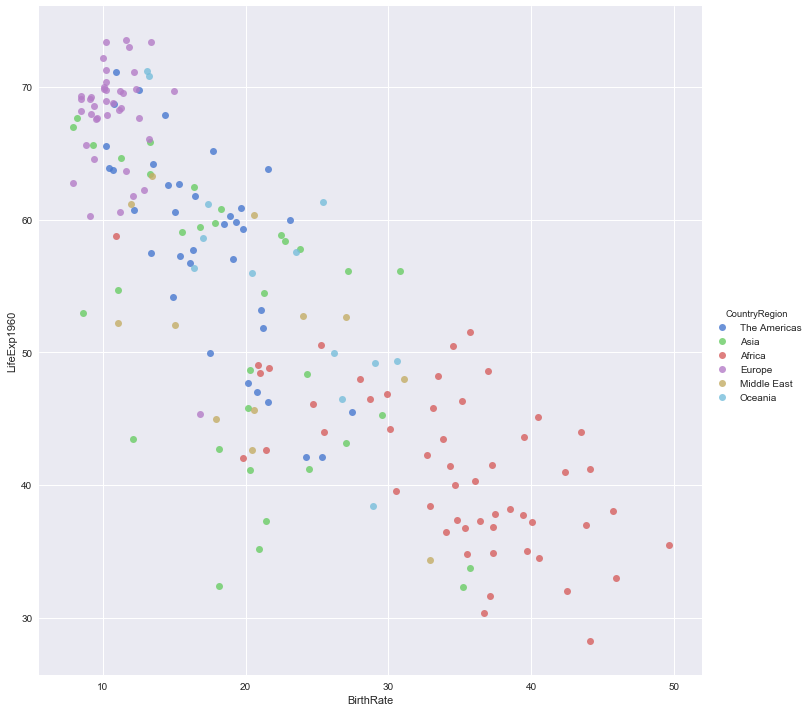

In [250]:
# Plot the BirthRate versus LifeExpectancy cathegorized by Country Region in 1960
vis3 = sns.lmplot( data = merged_data, x = 'BirthRate', y = 'LifeExp1960', fit_reg = False, hue = 'CountryRegion', size = 10 )

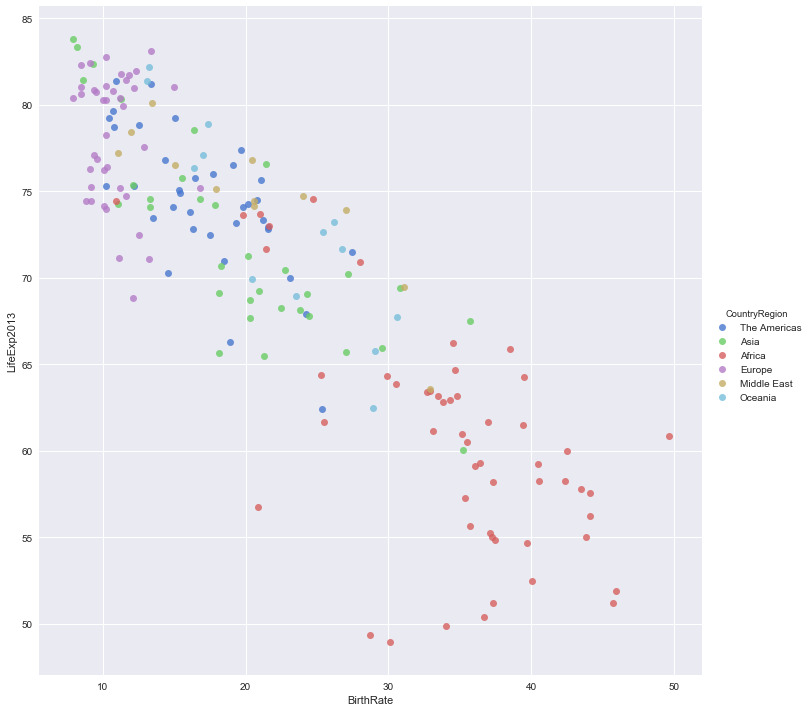

In [251]:
# Plot the BirthRate versus LifeExpectancy cathegorized by Country Region in 2013
vis4 = sns.lmplot( data = merged_data, x = 'BirthRate', y = 'LifeExp2013', fit_reg = False, hue = 'CountryRegion', size = 10 )

Question 6 : The movie reviews website was very happy with your deliverable for the previous assignment and now they have a new request for you.
The previous consultant had created a chart for them which is illustrated on the next slide. However the Python code used to create the diagram has since been lost and cannot be recovered. Your task is to come up with the code that will re-create the same chart making it look as close as possible to the original
A new dataset has been supplied. 

Import the packages needed to perform the analysis

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [253]:
# Import the data
mov = pd.read_csv('Section6-Homework-Data.csv', encoding = 'latin1')

In [254]:
# Explore the dataset
mov.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [255]:
# Check the summary of the dataframe
mov.describe()

,Budget ($mill),IMDb Rating,MovieLens Rating,Overseas%,Profit%,Runtime (min),US ($mill),Gross % US
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,92.467928,6.923849,3.340378,57.698849,719.278783,117.781250,167.135197,42.301151
std,59.421407,0.925890,0.454071,12.334237,1942.807248,23.179122,92.465903,12.334237
min,0.600000,3.600000,1.490000,17.200000,7.700000,30.000000,0.000000,0.000000
25%,45.000000,6.375000,3.037500,49.900000,201.850000,100.000000,106.950000,33.700000
50%,80.000000,6.900000,3.365000,58.200000,338.550000,116.000000,141.700000,41.800000
75%,130.000000,7.600000,3.672500,66.300000,650.100000,130.250000,202.100000,50.100000
max,300.000000,9.200000,4.500000,100.000000,41333.300000,238.000000,760.500000,82.800000


In [256]:
# Check the structure of the dataframe
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
Day of Week               608 non-null object
Director                  608 non-null object
Genre                     608 non-null object
Movie Title               608 non-null object
Release Date              608 non-null object
Studio                    608 non-null object
Adjusted Gross ($mill)    608 non-null object
Budget ($mill)            608 non-null float64
Gross ($mill)             608 non-null object
IMDb Rating               608 non-null float64
MovieLens Rating          608 non-null float64
Overseas ($mill)          608 non-null object
Overseas%                 608 non-null float64
Profit ($mill)            608 non-null object
Profit%                   608 non-null float64
Runtime (min)             608 non-null int64
US ($mill)                608 non-null float64
Gross % US                608 non-null float64
dtypes: float64(7), int64(1), object(10)
memory usage: 85.6+ 

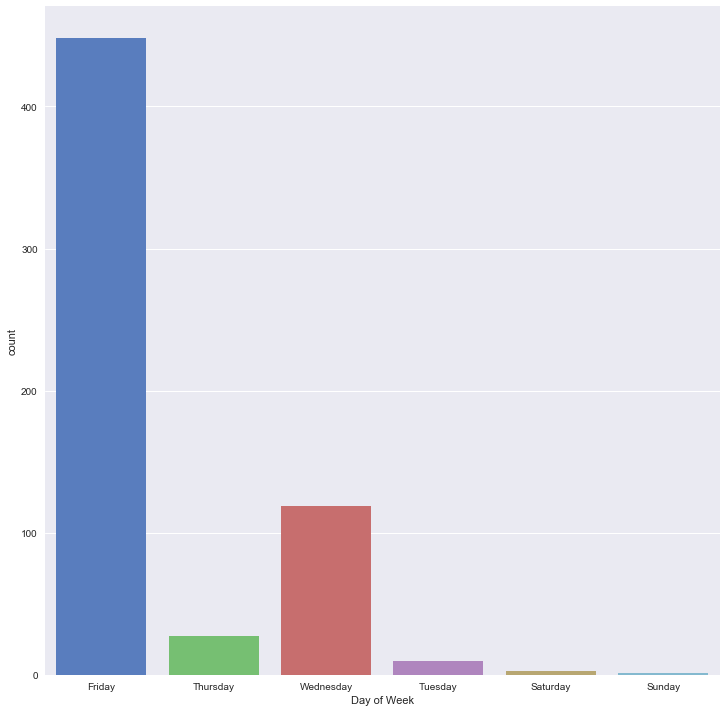

In [257]:
vis1 = sns.factorplot(data=mov,x= 'Day of Week', kind ='count',size=10)

In [258]:
# Explore the categorical variable Studio, used in the assignment
mov.Studio.unique()

array(['Buena Vista Studios', 'Lionsgate', 'Sony', 'Universal',
       'Paramount Pictures', 'WB', 'Weinstein Company',
       'UA Entertainment', 'WB/New Line', 'New Line Cinema', 'Fox',
       'TriStar', 'Relativity Media', 'Screen Gems', 'StudioCanal',
       'Fox Searchlight Pictures', 'MiraMax', 'Path_ Distribution',
       'DreamWorks', 'Lionsgate Films', 'Revolution Studios',
       'Dimension Films', 'USA', 'Lionsgate/Summit',
       'Sony Picture Classics', 'Pacific Data/DreamWorks', 'Disney',
       'Art House Studios', 'Colombia Pictures', 'Gramercy Pictures',
       'Summit Entertainment', 'Vestron Pictures', 'MGM', 'Orion', 'IFC',
       'New Market Films'], dtype=object)

In [259]:
len(mov.Studio.unique())

36

In [260]:
# Explore the categorical variable Genre, used in the assignment
mov.Genre.unique()

array(['action', 'comedy', 'adventure', 'horror', 'animation',
       'biography', 'drama', 'musical', 'sci-fi', 'crime', 'romance',
       'fantasy', 'mystery', 'thriller', 'documentary'], dtype=object)

In [261]:
len(mov.Genre.unique())

15

In [262]:
# Filter the dataframe by genre
mov2 = mov[(mov.Genre == 'action') | (mov.Genre == 'adventure') | (mov.Genre == 'animation') | (mov.Genre == 'comedy') | (mov.Genre == 'drama')]

In [263]:
mov2

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
5,Friday,David Ayer,action,Fury,17/10/2014,Sony,212.8,80.0,211.8,5.8,2.85,126,59.5,131.8,164.8,134,85.8,40.5
6,Thursday,Rob Marshall,adventure,Into the Woods,25/12/2014,Buena Vista Studios,213.9,50.0,212.9,6.0,3.16,84.9,39.9,162.9,325.8,125,128.0,60.1
7,Friday,Daniel Espinosa,action,Safe House,10/02/2012,Universal,215.5,85.0,208.1,6.8,3.45,81.7,39.3,123.1,144.8,115,126.4,60.7
8,Friday,Gary Shore,action,Dracula Untold,10/10/2014,Universal,216.5,70.0,215.5,6.3,2.92,159.2,73.9,145.5,207.9,92,56.3,26.1
10,Friday,Eric Brevig,animation,Yogi Bear,17/12/2010,WB,219.9,80.0,201.6,4.5,2.17,101.3,50.3,121.6,152.0,80,100.2,49.7


In [264]:
# Filter the dataframe by studio
mov3 = mov2[(mov2.Studio == 'Buena Vista Studios') | (mov2.Studio == 'Fox') | (mov2.Studio == 'Paramount Pictures') | (mov2.Studio == 'Sony') | (mov2.Studio == 'Universal') | (mov2.Studio == 'WB')]

In [265]:
mov3

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
5,Friday,David Ayer,action,Fury,17/10/2014,Sony,212.8,80.0,211.8,5.8,2.85,126,59.5,131.8,164.8,134,85.8,40.5
6,Thursday,Rob Marshall,adventure,Into the Woods,25/12/2014,Buena Vista Studios,213.9,50.0,212.9,6.0,3.16,84.9,39.9,162.9,325.8,125,128.0,60.1
7,Friday,Daniel Espinosa,action,Safe House,10/02/2012,Universal,215.5,85.0,208.1,6.8,3.45,81.7,39.3,123.1,144.8,115,126.4,60.7
8,Friday,Gary Shore,action,Dracula Untold,10/10/2014,Universal,216.5,70.0,215.5,6.3,2.92,159.2,73.9,145.5,207.9,92,56.3,26.1
10,Friday,Eric Brevig,animation,Yogi Bear,17/12/2010,WB,219.9,80.0,201.6,4.5,2.17,101.3,50.3,121.6,152.0,80,100.2,49.7
14,Friday,Ryan Murphy,drama,Eat Pray Love,13/08/2010,Sony,223.1,60.0,204.6,5.6,2.84,124,60.6,144.6,241.0,133,80.6,39.4


In [266]:
# Check how the filters worked
print (mov2.Genre.unique())
print (mov3.Studio.unique())
print (len(mov3))

['action' 'comedy' 'adventure' 'animation' 'drama']
['Buena Vista Studios' 'Sony' 'Universal' 'WB' 'Paramount Pictures' 'Fox']
423


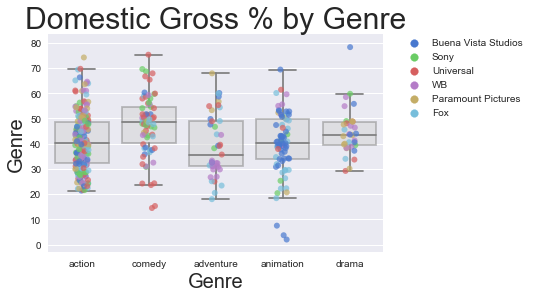

In [267]:
# Define the style
sns.set(style="darkgrid", palette="muted", color_codes=True)

# Plot the boxsplots
ax = sns.boxplot(data=mov3, x='Genre', y='Gross % US', orient='v', color='lightgray', showfliers=False)
plt.setp(ax.artists, alpha=0.5)

# Add in points to show each observation
sns.stripplot(x='Genre', y='Gross % US', data=mov3, jitter=True, size=6, linewidth=0, hue = 'Studio', alpha=0.7)

ax.axes.set_title('Domestic Gross % by Genre',fontsize=30)
ax.set_xlabel('Genre',fontsize=20)
ax.set_ylabel('Genre',fontsize=20)

# Define where to place the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)